<br/>
<h4>import packages<h4/>

In [347]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

<br/>
<h4>read data<h4/>

In [348]:
df = pd.read_csv('housePrice.csv')
df.head(4)

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33


<br/>
<h4>clean data and remove some features<h4/>

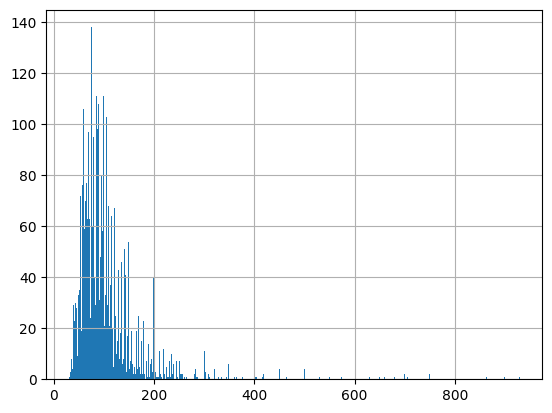

In [349]:
df['Area'] = pd.to_numeric(df['Area'], errors='coerce')
df = df.dropna(subset=['Area'])

df['Area'].hist(bins=500)

# remove area over 400
df = df[df['Area'] <= 400]

x = df[['Area', 'Room', 'Address']]
y = df[['Price']]


<Axes: >

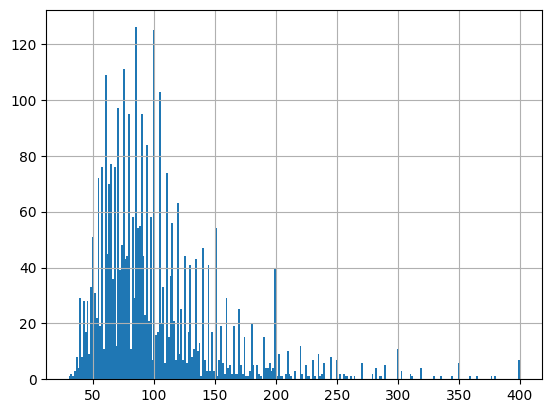

In [350]:
df['Area'].hist(bins=250)

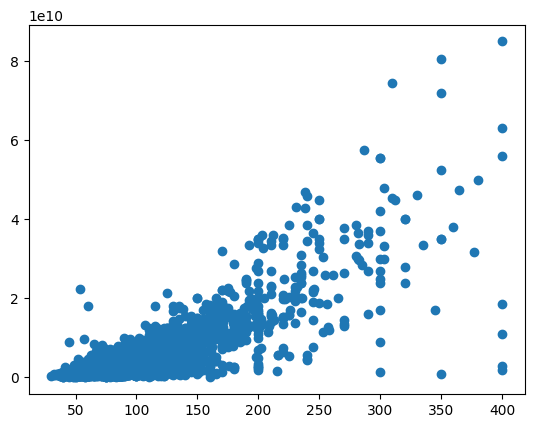

In [351]:
plt.scatter(x['Area'], y)

<br/>
<h4>split tran and test data 80 20<h4/>

In [352]:
x_tr , x_te, y_tr, y_te = train_test_split(x, y, test_size=0.2, random_state=4)

<br/>
<h4>preprocessing<h4/>
<h5>The 'Address' column is converted to multiple binary columns using OneHotEncoder. and The preprocessed data is fed to the LinearRegression model to be trained.<h5/>

In [353]:
column_transformer =  ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), ['Address'])
    ],
    remainder='passthrough',
    force_int_remainder_cols=False
)

pipeline = Pipeline(steps=[
    ('preprocessor', column_transformer),
    ('regressor', LinearRegression())
])



<br/>
<h4>model training and testing<h4/>

In [354]:
model = pipeline.fit(x_tr, y_tr)

yh = model.predict(x_te)

print(f"\nMean absolute error: {np.mean(np.absolute(yh - y_te))}.2f") 
print(f"Residual sum of squares (MSE): {np.mean((yh - y_te) ** 2)}.2f")  
print("R2-score: %.2f\n" % r2_score(y_te , yh) )





Mean absolute error: 1825394237.4296548.2f
Residual sum of squares (MSE): 1.1030322144625246e+19.2f
R2-score: 0.75



<br/>
<h4>Plotting<h4/>
<h5>(Draw a graph where the x-axis shows the actual values (y_test) and the y-axis shows the values predicted by the model (predictions). The red line represents the ideal line where the actual and predicted values are equal. The points that are closer to this line indicate the higher accuracy of the model.)<h5/>


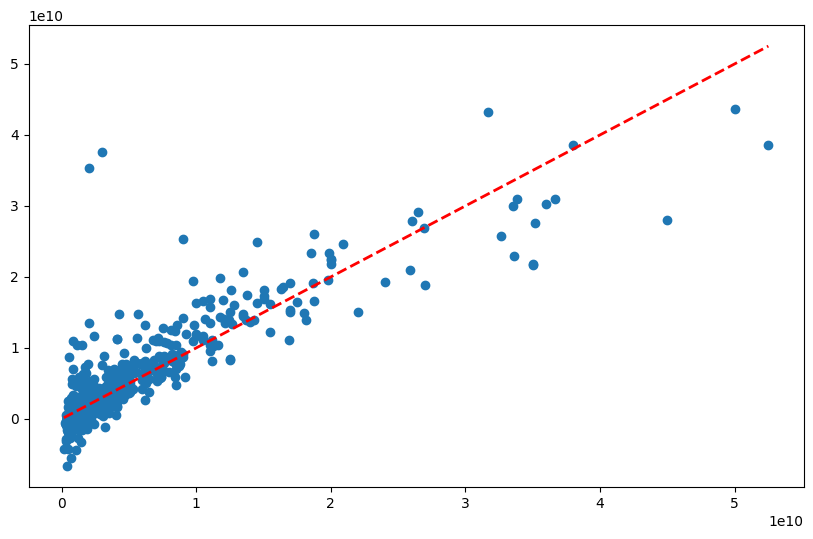

In [355]:
plt.figure(figsize=(10, 6))
plt.scatter(y2, yh)
plt.plot([y2.min(), y2.max()], [y2.min(), y2.max()], 'r--', lw=2)
plt.show()